# Final Project:
    

# Multilingual Video Synopsis Generator

#### Overview of the project

The Multilingual Video Synopsis Generator entails downloading the most recent video, utilising Google Speech Recognition to transcribe the audio material, tokenization, sentiment analysis, and translation into Arabic and French as preparation steps. Next, it uses pre-trained transformer models (BART and MBART) to generate summaries in English, Arabic, and French. The quality of these summaries is then assessed using ROUGE ratings. All in all, the project automates the summary process, allowing users to effectively extract important information from multilingual videos.

#  Import and Install Dependencies

In [9]:
import os
import pandas as pd
import numpy as np
import speech_recognition as sr
from nltk.tokenize import sent_tokenize
import soundfile as sf
from nltk import FreqDist
import nltk
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
from rouge_score import rouge_scorer
from transformers import BartForConditionalGeneration, BartTokenizer
from transformers import MBartForConditionalGeneration, MBart50Tokenizer
from googletrans import Translator
from pytube import YouTube
import moviepy.editor as mp


# Downloading video from YouTube

In [10]:
def download_video(video_url, output_path):
    yt = YouTube(video_url)
    stream = yt.streams.get_highest_resolution()
    stream.download(output_path=output_path)

VIDEO_URL = input("Enter the URL of the YouTube video to download: ")
output_path = "C:\\Users\\PAVAN TEJA\\NLP"

download_video(VIDEO_URL, output_path)

Enter the URL of the YouTube video to download: https://youtu.be/XyTcINLKq4c?si=a5NgEvKlcW3CAIyi


# Converting Video to Audio and Text

In [14]:
def download_and_transcribe_latest_video(folder_path):
    transcriptions = {} 

    mp4_files = [file_name for file_name in os.listdir(folder_path) if file_name.endswith('.mp4')]

    if not mp4_files:
        print("No mp4 files found in the folder.")
        return None

    # Sorting the files with most recent
    mp4_files.sort(key=lambda x: os.path.getctime(os.path.join(folder_path, x)), reverse=True)

    #Path of the latest video file
    latest_video_path = os.path.join(folder_path, mp4_files[0])
    print(f"Latest video file: {latest_video_path}")

    # Download and transcribe latest video
    transcriptions = download_and_transcribe_video(latest_video_path)
    return transcriptions

def download_and_transcribe_video(video_path):
    transcriptions = {}  # Dictionary to store transcribed texts
    print(f"Processing video: {video_path}")

    video_clip = mp.VideoFileClip(video_path)
    audio_clip = video_clip.audio
    audio_path = os.path.splitext(video_path)[0] + ".wav"
    audio_clip.write_audiofile(audio_path)

    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio_duration = audio_clip.duration
        chunk_duration = 200 
        num_chunks = int(audio_duration / chunk_duration) + 1
        full_text = ""  

        for i in range(num_chunks):
            start_time = i * chunk_duration
            end_time = min((i + 1) * chunk_duration, audio_duration)
            print(f"Processing chunk {i+1}/{num_chunks}")

            chunk = audio_clip.subclip(start_time, end_time)
            chunk_audio_path = os.path.splitext(video_path)[0] + f"chunk{i}.wav"
            chunk.write_audiofile(chunk_audio_path)

            with sr.AudioFile(chunk_audio_path) as chunk_source:
                audio_data = recognizer.record(chunk_source)
                try:
                    text = recognizer.recognize_google(audio_data)
                    print(f"Transcribed text from {os.path.basename(video_path)} chunk {i+1}: {text}")
                    full_text += text  
                except sr.UnknownValueError:
                    print("Speech recognition could not understand the audio")
                except sr.RequestError as e:
                    print(f"Could not request results from Google Speech Recognition service; {e}")

        transcriptions[os.path.basename(video_path)] = full_text  

    return transcriptions

folder_path = r"C:\Users\PAVAN TEJA\NLP"
transcriptions = download_and_transcribe_latest_video(folder_path)
print("Transcriptions:")
for text in transcriptions.items():
    print(text)


Latest video file: C:\Users\PAVAN TEJA\NLP\Four billion years of evolution in six minutes  Prosanta Chakrabarty.mp4
Processing video: C:\Users\PAVAN TEJA\NLP\Four billion years of evolution in six minutes  Prosanta Chakrabarty.mp4
MoviePy - Writing audio in C:\Users\PAVAN TEJA\NLP\Four billion years of evolution in six minutes  Prosanta Chakrabarty.wav


MoviePy - Done.
Processing chunk 1/2
MoviePy - Writing audio in C:\Users\PAVAN TEJA\NLP\Four billion years of evolution in six minutes  Prosanta Chakrabartychunk0.wav


MoviePy - Done.
Transcribed text from Four billion years of evolution in six minutes  Prosanta Chakrabarty.mp4 chunk 1: if we evolved from monkeys why are there still monkeys well because we're not monkeys wear fish now knowing you're a fish and not a monkey is actually really important to understanding where we came from I teach one of the largest evolutionary biology classes in the US and when my students finally understand why I called him fish all the time then I know I'm getting my job dot because Without Really knowing it many of us were taught Evolution wrong for instance were taught to say the theory of evolution they're actually many theories and just like the process itself the ones that best fit the data are the ones that survived to this day the one we know best is darwinian natural selection that's the process by which those organisms that best fit in environment survive and get to reproduce while those that are less than slowly die off and that's it evolution is a simple 

MoviePy - Done.
Transcribed text from Four billion years of evolution in six minutes  Prosanta Chakrabarty.mp4 chunk 2: Ross about 3 billion years ago multicellularity of all this includes your fungi and your plants and your animals the first animals to develop a backbone were fishes so technically all vertebrates are fishes so technically you and I are fish so don't say I didn't warn you one fish lineage came onto land and gave rise to among other things the mammals and reptiles some reptiles become Birds some mammals become primates some primates become monkeys with Tails and others become the great apes including a variety of human species so you see we didn't evolved from monkeys but we do share a common ancestor with him all the wildlife around us kept evolving more bacteria more fungi lots of fish fish fish fish fish fish fish as life evolves it also goes extinct most species just last for a few million years so he most likely on Earth that we see around us today are about the sa

In [15]:
my_tuple = (text)
text = ' '.join(my_tuple)
print(text)

Four billion years of evolution in six minutes  Prosanta Chakrabarty.mp4 if we evolved from monkeys why are there still monkeys well because we're not monkeys wear fish now knowing you're a fish and not a monkey is actually really important to understanding where we came from I teach one of the largest evolutionary biology classes in the US and when my students finally understand why I called him fish all the time then I know I'm getting my job dot because Without Really knowing it many of us were taught Evolution wrong for instance were taught to say the theory of evolution they're actually many theories and just like the process itself the ones that best fit the data are the ones that survived to this day the one we know best is darwinian natural selection that's the process by which those organisms that best fit in environment survive and get to reproduce while those that are less than slowly die off and that's it evolution is a simple as that and it's a fact evolution is a fact as 

# Pre-Processing

#### Text Tokenization

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\PAVAN
[nltk_data]     TEJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
def tokenize(text):
    sentences = text.split('.')
    return [sentence.strip() for sentence in sentences if sentence.strip()]

#### Stopword Removal and Frequency Analysis

In [21]:
nltkstopwords = nltk.corpus.stopwords.words('english')
otherstopwords = ['could','would','might','must','need', 'sha','wo','y', "'s", "'d", "'ll", "'t", "'re" ]
stopwords = nltkstopwords + otherstopwords
token = nltk.word_tokenize(text) #all words within text
words = [w.lower() for w in token] # converted to lowercase
vocab = sorted(set(words)) #unique words/vocabulary used
stoppedtokens = [w for w in words if not w in stopwords] #filter out stopwords without any meaning
fdist = FreqDist(stoppedtokens)
fdistkeys = list(fdist.keys())
topkeys = fdist.most_common(50) #the 50 most frequent words used in given text

#### Bigram Analysis

In [22]:
bigrams = list(nltk.bigrams(stoppedtokens))
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(stoppedtokens)
scored = finder.score_ngrams(bigram_measures.raw_freq)
scored[:10]

[(('fish', 'fish'), 0.015037593984962405),
 (('billion', 'years'), 0.010025062656641603),
 (('4', 'billion'), 0.005012531328320802),
 (('around', 'us'), 0.005012531328320802),
 (('bacteria', 'primitive'), 0.005012531328320802),
 (('best', 'fit'), 0.005012531328320802),
 (('evolution', 'right'), 0.005012531328320802),
 (('evolved', 'monkeys'), 0.005012531328320802),
 (('fishes', 'technically'), 0.005012531328320802),
 (('gave', 'rise'), 0.005012531328320802)]

#### Word Cloud Visualization

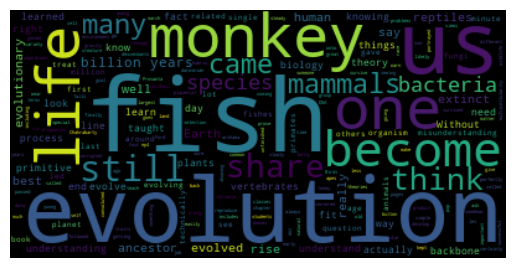

In [23]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Sentiment Analysis of Vocabulary

In [24]:
sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]
for word in vocab:
    if (sid.polarity_scores(word)['compound']) >= 0.5:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.5:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)  
print('Positive :',pos_word_list)          
print('Negative :',neg_word_list)

Positive : ['best', 'great', 'perfectly', 'successful', 'survived']
Negative : ['die']


#### URL Punctuation

In [25]:
url_punctuator = 'http://bark.phon.ioc.ee/punctuator'
r = requests.post(url_punctuator, data = {'text': text})
text_punctuated = r.text

#### Sentiment Analysis of Punctuated Sentences

In [26]:
sentences = sent_tokenize(text_punctuated)
df = pd.DataFrame(sentences)
analyser = SentimentIntensityAnalyzer()
results = []
for sent in sentences:
    score = analyser.polarity_scores(sent)
    score['description'] = sent
    results.append(score)
df_scores = pd.DataFrame(results)

#### Sentiment Labeling and Analysis

In [27]:
df_scores['label'] = 0
df_scores.loc[df_scores['compound'] > 0.2, 'label'] = 1
df_scores.loc[df_scores['compound'] < -0.2, 'label'] = -1
df_sorted1 = df_scores.sort_values(by='compound', ascending = False) #sorting positive sentences
df_sorted2 = df_scores.sort_values(by='compound') #sorting negative sentences
print('Number of positive words:' + str(len(df_scores[df_scores['label']==1]))) #number of positive sentences
print('Number of negative words:' + str(len(df_scores[df_scores['label']==-1]))) #number of negative sentences
print('Number of neutral words:' + str(len(df_scores[df_scores['label']==0]))) #number of neutral sentences

Number of positive words:16
Number of negative words:1
Number of neutral words:14


<!-- Text-conversion -->

# Translating to Arabic and French

In [28]:
def translate_to_arabic(text):
    translator = Translator()
    translated_text_chunks = []
    chunk_size = 2000
    for i in range(0, len(text), chunk_size):
        chunk = text[i:i + chunk_size]
        translated_chunk = translator.translate(chunk, dest='ar').text
        translated_text_chunks.append(translated_chunk)
    
    translated_text = ' '.join(translated_text_chunks)
    return translated_text

# Function for translating text to French in chunks
def translate_to_french(text):
    translator = Translator()
    translated_text_chunks = []
    
    chunk_size = 5000
    for i in range(0, len(text), chunk_size):
        chunk = text[i:i + chunk_size]
        translated_chunk = translator.translate(chunk, dest='fr').text
        translated_text_chunks.append(translated_chunk)
    
    translated_text = ' '.join(translated_text_chunks)
    return translated_text

text_for_translation = text_punctuated

# Translation to arabic
translated_arabic_text = translate_to_arabic(text_for_translation)
print("Translated Text (Arabic):")
print(translated_arabic_text)

# Translating to french
translated_french_text = translate_to_french(text_for_translation)
print("Translated Text (French):")
print(translated_french_text)

Translated Text (Arabic):
أربعة مليارات سنة من التطور في ست دقائق ، ProSanta Chakrabarty.mp4 ، إذا تطورنا من القرود ، لماذا لا تزال هناك قرود؟حسنًا ، لأننا لا نرتدي السمك الآن ، مع العلم أنك سمكة وليس قردًا ، من المهم حقًا فهم من أين أتينا.أقوم بتدريس واحدة من أكبر فصول علم الأحياء التطورية في الولايات المتحدة ، وعندما يفهم طلابي أخيرًا سبب وصفه به الأسماك طوال الوقت ، ثم أعلم أنني أحصل على وظيفتي ، لأنه دون معرفة ذلك حقًا ، تم تعليم الكثير منا التطورعلى سبيل المثال ، تم تعليم الخطأ أن يقولوا نظرية التطور ، فهي في الواقع العديد من النظريات ، تمامًا مثل العملية نفسها ، تلك التي تناسب البيانات هي التي نجت حتى يومنا هذا.الشخص الذي نعرفه أفضل هو الانتقاء الطبيعي الدارويني.هذه هي العملية التي تبقى من خلالها تلك الكائنات الحية التي تناسب البيئة والتكاثر ، في حين أن تلك التي تموت ببطء وهذا كل شيء.التطور بسيط على هذا النحو وهي حقيقة.التطور هو حقيقة بقدر نظرية الجاذبية ، ويمكنك إثبات أنها سهولة فقط تحتاج إلى إلقاء نظرة على زر بطنك الذي تشاركه مع الثدييات المشيمة الأخرى أو العمود الفقري الخاص بك

# Arabic Summarization

In [30]:
def summarize_arabic_text(input_text):
    model_name = "facebook/mbart-large-50"
    tokenizer = MBart50Tokenizer.from_pretrained(model_name)
    model = MBartForConditionalGeneration.from_pretrained(model_name)

    chunk_size = 1024
    chunks = [input_text[i:i+chunk_size] for i in range(0, len(input_text), chunk_size)]

    summaries = []
    for chunk in chunks:
        inputs = tokenizer(chunk, max_length=1024, return_tensors="pt", truncation=True, padding=True)
        summary_ids = model.generate(inputs.input_ids, num_beams=4, max_length=150, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        summaries.append(summary)

    final_summary = ". ".join(summaries)

    return final_summary

Arabic_text = translated_arabic_text
Arabic_Summary = summarize_arabic_text(Arabic_text)
print("Arabic Summary:")
print(Arabic_Summary)


Arabic Summary:
أربعة مليارات سنة من التطور في ست دقائق ، ProSanta Chakrabarty.mp4 ، إذا تطورنا من القرود ، لماذا لا تزال هناك قرود؟حسنًا ، لأننا لا نرتدي السمك الآن ، مع العلم أنك سمكة وليس قردًا ، من المهم حقًا فهم من أين أتينا.أقوم بتدريس واحدة من أكبر فصول علم الأحياء التطورية في الولايات المتحدة ، وعندما يفهم طلابي أخيرًا سبب وصفه به الأسماك طوال الوقت ، ثم أعلم أنني أحصل على وظيفتي ، لأنه دون معرفة ذلك حقًا ، تم تعليم الكثير منا التطورعلى سبيل المثال ، تم تعليم. الذي تشاركه مع كل الحياة الأخرى على الأرض لم تظهر تلك الصفات في البشر.تم نقلهم من أسلاف مختلفين إلى جميع أحفادهم ، وليس فقط نحن.حسنًا ، هذا ليس حقًا كيف نتعلم علم الأحياء في وقت مبكر.هل تعلمنا النباتات والبكتيريا والأشياء البدائية والأسماك التي تؤدي إلى البرمائيات ، تليها الزواحف والثدييات ، ثم تحصل على هذا المخلوق المتطور تمامًا في نهاية الخط ، لا تتطور الحياة في خط وهيلا ينتهي معنا ، لكننا نعرض دائمًا أن التطور صور شيئًا كهذا: قرد وشمبانزي بعض البشر المنقرضين. حياة خلية واحدة أخرى ، لكن هذه لا تزال تتطور حتى يومنا هذا ،

# English Summarization

In [31]:
def summarize_large_text(input_text):
    model_name = "facebook/bart-large-cnn"
    tokenizer = BartTokenizer.from_pretrained(model_name)
    model = BartForConditionalGeneration.from_pretrained(model_name)

    chunk_size = 1024 
    chunks = [input_text[i:i+chunk_size] for i in range(0, len(input_text), chunk_size)]

    summaries = []
    for chunk in chunks:
        inputs = tokenizer([chunk], max_length=1024, return_tensors="pt", truncation=True)
        summary_ids = model.generate(inputs["input_ids"], num_beams=4, max_length=150, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        summaries.append(summary)

    final_summary = ". ".join(summaries)

    return final_summary

user_text = text_punctuated
English_Summary = summarize_large_text(user_text)
print("English Summary:")
print(English_Summary)


English Summary:
Four billion years of evolution in six minutes, Prosanta Chakrabarty.mp4, if we evolved from monkeys, why are there still monkeys? Well because we're not monkeys wear fish now, knowing you're a fish and not a monkey, is actually really important to understanding where we came from.. s the theory of gravity, and you can prove it just as easily just need to look at your belly button. They share with other vertebrates or your DNA that you share with all other life on Earth. Those traits didn't pop up in humans. They were passed down from different ancestors to all their descendants, not just us.. Evolution has led to many convoluted and corrupted views of how we should treat other life on Earth. So let's go back 4 billion years. This is the single-celled organism we all came from. They gave rise to other single cell life, but these are still evolving to this day.. her things, the mammals and reptiles, some reptiles become Birds, some mammals become primates, some primates

# French Summarization

In [32]:
def summarize_large_french_text(input_text):
    model_name = "facebook/bart-large-cnn"
    tokenizer = BartTokenizer.from_pretrained(model_name)
    model = BartForConditionalGeneration.from_pretrained(model_name)

    chunk_size = 1024 
    chunks = [input_text[i:i+chunk_size] for i in range(0, len(input_text), chunk_size)]

    summaries = []
    for chunk in chunks:
        inputs = tokenizer([chunk], max_length=1024, return_tensors="pt", truncation=True)
        summary_ids = model.generate(inputs["input_ids"], num_beams=4, max_length=150, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        summaries.append(summary)

    final_summary = ". ".join(summaries)

    return final_summary

french_text = translated_french_text
French_Summary = summarize_large_french_text(french_text)
print("French Summary:")
print(French_Summary)



French Summary:
Quatre milliards d'années d'évolution en six minutes, Prosanta Chakrabarty.mp4, si nous évoluons de singes, pourquoi y a-t-il encore des singes?Eh bien parce que nous ne sommes pas des singe qui portent du poisson maintenant.. L'évolution est un fait autant que la théorie de la gravité. Vous pouvez le prouver tout aussi facilement pour regarder votre nombril que vous partagez avec d'autres mammifères placentaires ou épine dorsale.. L'évolution des malentendus a conduit à de nombreux problèmes, mais vous ne pouvez pas poser cette question. L'organisme à cellule unique dont nous venons tous au début. Revenons donc 4 milliards d'années.. La multicellularité de tout cela comprend vos champignons et vos plantes. Les premiers animaux à développer une épine dorsale, étaient des poissons. Donc, techniquement, vous et moi sommes du poisson.. Pendant quelques millions d'années, il est donc très probablement sur terre que nous voyons autour de nous aujourd'hui. C'est donc l'orguei

# Rogue_score: English

In [33]:
def calculate_rouge_scores(reference_summary, generated_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(text, English_Summary) # Calculating ROUGE scores
    return scores

reference_summary = text
generated_summary = English_Summary

rouge_scores = calculate_rouge_scores(reference_summary, generated_summary)

for metric, score in rouge_scores.items():
    print(f'{metric}: {score}')


rouge1: Score(precision=0.9969879518072289, recall=0.3839907192575406, fmeasure=0.5544388609715243)
rouge2: Score(precision=0.972809667673716, recall=0.37398373983739835, fmeasure=0.540268456375839)
rougeL: Score(precision=0.9969879518072289, recall=0.3839907192575406, fmeasure=0.5544388609715243)


# Rogue score: Arabic

In [34]:
def calculate_rouge_scores(reference_summary, generated_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(translated_arabic_text, Arabic_Summary) # Calculating ROUGE scores
    return scores

reference_summary = translated_arabic_text
generated_summary = Arabic_Summary

rouge_scores = calculate_rouge_scores(reference_summary, generated_summary)

for metric, score in rouge_scores.items():
    print(f'{metric}: {score}')


rouge1: Score(precision=1.0, recall=0.875, fmeasure=0.9333333333333333)
rouge2: Score(precision=0.8333333333333334, recall=0.7142857142857143, fmeasure=0.7692307692307692)
rougeL: Score(precision=1.0, recall=0.875, fmeasure=0.9333333333333333)


# Rogue Score: French

In [35]:
def calculate_rouge_scores(reference_summary, generated_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(translated_french_text, French_Summary) # Calculating ROUGE scores
    return scores

reference_summary = translated_french_text
generated_summary = French_Summary

rouge_scores = calculate_rouge_scores(reference_summary, generated_summary)

for metric, score in rouge_scores.items():
    print(f'{metric}: {score}')


rouge1: Score(precision=1.0, recall=0.21136590229312063, fmeasure=0.3489711934156378)
rouge2: Score(precision=0.9478672985781991, recall=0.1996007984031936, fmeasure=0.3297609233305854)
rougeL: Score(precision=0.9858490566037735, recall=0.20837487537387836, fmeasure=0.34403292181069955)
